In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

In [2]:
mavoix=pd.read_excel("E:/datasets/mavoixmlsampledataset.xlsx")

In [3]:
mavoix.head()

,Application_ID,Current City,Python (out of 3),R Programming (out of 3),Deep Learning (out of 3),PHP (out of 3),MySQL (out of 3),HTML (out of 3),CSS (out of 3),JavaScript (out of 3),...,Node.js (out of 3),ReactJS (out of 3),Other skills,Degree,Stream,Current Year Of Graduation,Performance_PG,Performance_UG,Performance_12,Performance_10
0,ML0001,Bangalore,0,2,0,2,0,2,3,2,...,0,0,R Programming,Bachelor of Science (B.Sc),Mathematics,2017,NaN,NaN,NaN,NaN
1,ML0002,Bangalore,2,0,0,2,2,2,2,2,...,0,0,"Data Science, Machine Learning, Neural Network...",Bachelor of Technology (B.Tech),Computer Science & Engineering,2019,NaN,85.50/100,92.20/92.20,96.60/96.60
2,ML0003,Bangalore,3,0,1,2,2,2,0,2,...,0,0,"Algorithms, Data Structures, Python, C Program...",Master of Science (M.Sc),Computer Science,2018,7.91/10,70.00/100,64.83/64.83,77.60/77.60
3,ML0004,Bangalore,2,0,2,1,0,2,0,0,...,0,0,"CSS, Deep Learning, Embedded Systems, HTML, Ma...",Bachelor of Engineering (B.E),Electronics and Communication,2019,NaN,6.86/10,76.00/76.00,84.32/84.32
4,ML0005,Bangalore,2,0,0,2,0,2,1,1,...,2,2,"HTML, OpenCV, Python, SQL, C++ Programming, CS...",Bachelor of Technology (B.Tech),Production Engineering,2018,NaN,6.38/10,65.20/65.20,68.80/68.80


In [5]:
mavoix.shape

(392, 24)

In [58]:
mavoix.index

RangeIndex(start=0, stop=392, step=1)

In [6]:
mavoix.isnull().sum()

Application_ID                  0
Current City                    0
Python (out of 3)               0
R Programming (out of 3)        0
Deep Learning (out of 3)        0
PHP (out of 3)                  0
MySQL (out of 3)                0
HTML (out of 3)                 0
CSS (out of 3)                  0
JavaScript (out of 3)           0
Unnamed: 10                   392
AJAX (out of 3)                 0
Bootstrap (out of 3)            0
MongoDB (out of 3)              0
Node.js (out of 3)              0
ReactJS (out of 3)              0
Other skills                   14
Degree                         12
Stream                         18
Current Year Of Graduation      0
Performance_PG                289
Performance_UG                 54
Performance_12                163
Performance_10                177
dtype: int64

In [7]:
mavoix.columns

Index(['Application_ID', 'Current City', 'Python (out of 3)',
       'R Programming (out of 3)', 'Deep Learning (out of 3)',
       'PHP (out of 3)', 'MySQL (out of 3)', 'HTML (out of 3)',
       'CSS (out of 3)', 'JavaScript (out of 3)', 'Unnamed: 10',
       'AJAX (out of 3)', 'Bootstrap (out of 3)', 'MongoDB (out of 3)',
       'Node.js (out of 3)', 'ReactJS (out of 3)', 'Other skills', 'Degree',
       'Stream', 'Current Year Of Graduation', 'Performance_PG',
       'Performance_UG', 'Performance_12', 'Performance_10'],
      dtype='object')

In [13]:
mavoix['Unnamed: 10'].value_counts

<bound method IndexOpsMixin.value_counts of 0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
387   NaN
388   NaN
389   NaN
390   NaN
391   NaN
Name: Unnamed: 10, Length: 392, dtype: float64>

In [31]:
column=['Unnamed: 10']
mavoix=mavoix.drop(column,axis=1)

In [32]:
mavoix.shape

(392, 23)

In [33]:
mavoix.shape

(392, 23)

In [34]:
mavoix.columns

Index(['Application_ID', 'Current City', 'Python (out of 3)',
       'R Programming (out of 3)', 'Deep Learning (out of 3)',
       'PHP (out of 3)', 'MySQL (out of 3)', 'HTML (out of 3)',
       'CSS (out of 3)', 'JavaScript (out of 3)', 'AJAX (out of 3)',
       'Bootstrap (out of 3)', 'MongoDB (out of 3)', 'Node.js (out of 3)',
       'ReactJS (out of 3)', 'Other skills', 'Degree', 'Stream',
       'Current Year Of Graduation', 'Performance_PG', 'Performance_UG',
       'Performance_12', 'Performance_10'],
      dtype='object')

In [36]:
mavoix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 23 columns):
Application_ID                392 non-null object
Current City                  392 non-null object
Python (out of 3)             392 non-null int64
R Programming (out of 3)      392 non-null int64
Deep Learning (out of 3)      392 non-null int64
PHP (out of 3)                392 non-null int64
MySQL (out of 3)              392 non-null int64
HTML (out of 3)               392 non-null int64
CSS (out of 3)                392 non-null int64
JavaScript (out of 3)         392 non-null int64
AJAX (out of 3)               392 non-null int64
Bootstrap (out of 3)          392 non-null int64
MongoDB (out of 3)            392 non-null int64
Node.js (out of 3)            392 non-null int64
ReactJS (out of 3)            392 non-null int64
Other skills                  378 non-null object
Degree                        380 non-null object
Stream                        374 non-null object
Current 

In [64]:
for i in mavoix.columns:
    print("Variable name:",i)
    print(mavoix[i].value_counts())

Variable name: Application_ID
ML0132    1
ML0029    1
ML0075    1
ML0307    1
ML0003    1
         ..
ML0063    1
ML0168    1
ML0098    1
ML0217    1
ML0050    1
Name: Application_ID, Length: 392, dtype: int64
Variable name: Current City
Bangalore     214
Hyderabad      22
Banglore       14
Chennai        12
Pune           10
             ... 
Barhampur       1
Chandigarh      1
Raebareli       1
Tiruppur        1
Vellore         1
Name: Current City, Length: 63, dtype: int64
Variable name: Python
2    182
0    105
1     70
3     35
Name: Python, dtype: int64
Variable name: R programming
0    272
2     82
1     28
3     10
Name: R programming, dtype: int64
Variable name: DeepLearning
0    292
2     63
1     28
3      9
Name: DeepLearning, dtype: int64
Variable name: PHP
0    258
2     86
1     38
3     10
Name: PHP, dtype: int64
Variable name: MySQL
0    312
2     54
1     14
3     12
Name: MySQL, dtype: int64
Variable name: HTML
2    178
0    134
3     46
1     34
Name: HTML, dtype: i

In [44]:
mavoix=mavoix.rename(columns={'Python (out of 3)':'Python','R Programming (out of 3)':'R programming','Deep Learning (out of 3)':'DeepLearning','PHP (out of 3)':'PHP','MySQL (out of 3)':'MySQL','HTML (out of 3)':'HTML','CSS (out of 3)':'CSS','JavaScript (out of 3)':'JavaScript','AJAX (out of 3)':'AJAX','Bootstrap (out of 3)':'Bootstrap','MongoDB (out of 3)':'MongoDB',
'Node.js (out of 3)':'Node.js','ReactJS (out of 3)':'ReactJs'})

In [45]:
mavoix.isnull().sum()

Application_ID                  0
Current City                    0
Python                          0
R programming                   0
DeepLearning                    0
PHP                             0
MySQL                           0
HTML                            0
CSS                             0
JavaScript                      0
AJAX                            0
Bootstrap                       0
MongoDB                         0
Node.js                         0
ReactJs                         0
Other skills                   14
Degree                         12
Stream                         18
Current Year Of Graduation      0
Performance_PG                289
Performance_UG                 54
Performance_12                163
Performance_10                177
dtype: int64

In [46]:
mavoix=mavoix.drop(['Performance_PG','Performance_12','Performance_10'],axis=1)

In [47]:
mavoix.isnull().sum()

Application_ID                 0
Current City                   0
Python                         0
R programming                  0
DeepLearning                   0
PHP                            0
MySQL                          0
HTML                           0
CSS                            0
JavaScript                     0
AJAX                           0
Bootstrap                      0
MongoDB                        0
Node.js                        0
ReactJs                        0
Other skills                  14
Degree                        12
Stream                        18
Current Year Of Graduation     0
Performance_UG                54
dtype: int64

In [50]:
mavoix['Other skills'].value_counts()

MS-Word, C Programming, CSS, Embedded Systems, HTML, JavaScript, MS-Excel, MS-Office, MS-PowerPoint, ReactJS                                                                                                                                                                 4
Android, Java                                                                                                                                                                                                                                                                4
Data Analytics, Machine Learning, Python                                                                                                                                                                                                                                     4
HTML, Android, C Programming, C++ Programming, CSS, Java, PHP, Python                                                                                                                      

In [51]:
mavoix['Degree'].value_counts()

Bachelor of Technology (B.Tech)                          110
Bachelor of Engineering (B.E)                             84
Master of Computer Applications (MCA)                     70
B.Tech (Hons.)                                            25
Master of Technology (M.Tech)                             19
Master of Science (M.Sc)                                  14
Bachelor of Computer Applications (BCA)                   10
Post Graduate Programme (PGP)                              8
Bachelor of Science (B.Sc)                                 5
Integrated M.Sc.                                           5
PG Diploma in Data Science                                 5
MBA                                                        2
Integrated B.Tech & M.Tech                                 2
Bachelor of Commerce (B.Com)                               2
Post Graduate Diploma in Management (P.G.D.M.)             2
Integrated B.Tech                                          2
Post Graduate Diploma   

In [52]:
mavoix['Stream'].value_counts()

Computer  Science                    64
Electronics and Communication        46
Computer Science & Engineering       45
Computer Application                 35
Information Technology               20
                                     ..
Marketing                             1
Technology                            1
Engineering Physics                   1
Advanced Big Data Analytics           1
Information Science & Engineering     1
Name: Stream, Length: 78, dtype: int64

In [54]:
mavoix['Performance_UG'].value_counts()

70.00/100    12
7.20/10       8
6.80/10       8
60.00/100     7
56.00/100     6
             ..
8.77/10       1
6.77/10       1
7.32/10       1
7.09/10       1
62.65/100     1
Name: Performance_UG, Length: 173, dtype: int64

In [57]:
mavoix['Other skills'].mode()

0                                        Android, Java
1             Data Analytics, Machine Learning, Python
2    MS-Word, C Programming, CSS, Embedded Systems,...
dtype: object

In [59]:
mavoix['Other skills']=mavoix['Other skills'].fillna(mavoix['Other skills'].mode()[0])

In [60]:
mavoix.isnull().sum()

Application_ID                 0
Current City                   0
Python                         0
R programming                  0
DeepLearning                   0
PHP                            0
MySQL                          0
HTML                           0
CSS                            0
JavaScript                     0
AJAX                           0
Bootstrap                      0
MongoDB                        0
Node.js                        0
ReactJs                        0
Other skills                   0
Degree                        12
Stream                        18
Current Year Of Graduation     0
Performance_UG                54
dtype: int64

In [61]:
mavoix['Degree'].mode()

0    Bachelor of Technology (B.Tech)
dtype: object

In [62]:
mavoix['Degree']=mavoix['Degree'].fillna(mavoix['Degree'].mode()[0])

In [65]:
mavoix['Stream']=mavoix['Stream'].fillna(mavoix['Stream'].mode()[0])

In [66]:
mavoix['Performance_UG']=mavoix['Performance_UG'].fillna(mavoix['Performance_UG'].mode()[0])

In [67]:
mavoix.isnull().sum()

Application_ID                0
Current City                  0
Python                        0
R programming                 0
DeepLearning                  0
PHP                           0
MySQL                         0
HTML                          0
CSS                           0
JavaScript                    0
AJAX                          0
Bootstrap                     0
MongoDB                       0
Node.js                       0
ReactJs                       0
Other skills                  0
Degree                        0
Stream                        0
Current Year Of Graduation    0
Performance_UG                0
dtype: int64

In [69]:
a=mavoix[['Application_ID','Current City','Stream','Current Year Of Graduation','Performance_UG']]

In [75]:
b=mavoix[['Python','R programming','DeepLearning','PHP','MySQL','HTML','CSS','JavaScript','AJAX','Bootstrap','MongoDB','Node.js','ReactJs','Other skills','Degree']]

In [76]:
for i in b.columns:
    print("Variable Name:",i)
    print(b[i].astype('category'))

Variable Name: Python
0      0
1      2
2      3
3      2
4      2
      ..
387    2
388    2
389    1
390    2
391    2
Name: Python, Length: 392, dtype: category
Categories (4, int64): [0, 1, 2, 3]
Variable Name: R programming
0      2
1      0
2      0
3      0
4      0
      ..
387    1
388    0
389    0
390    2
391    3
Name: R programming, Length: 392, dtype: category
Categories (4, int64): [0, 1, 2, 3]
Variable Name: DeepLearning
0      0
1      0
2      1
3      2
4      0
      ..
387    0
388    0
389    0
390    0
391    0
Name: DeepLearning, Length: 392, dtype: category
Categories (4, int64): [0, 1, 2, 3]
Variable Name: PHP
0      2
1      2
2      2
3      1
4      2
      ..
387    0
388    2
389    0
390    0
391    2
Name: PHP, Length: 392, dtype: category
Categories (4, int64): [0, 1, 2, 3]
Variable Name: MySQL
0      0
1      2
2      2
3      0
4      0
      ..
387    0
388    0
389    0
390    0
391    0
Name: MySQL, Length: 392, dtype: category
Categories (4, int

In [77]:
mavoix1=pd.concat([a,b],axis=1)

In [78]:
mavoix1.head()

,Application_ID,Current City,Stream,Current Year Of Graduation,Performance_UG,Python,R programming,DeepLearning,PHP,MySQL,HTML,CSS,JavaScript,AJAX,Bootstrap,MongoDB,Node.js,ReactJs,Other skills,Degree
0,ML0001,Bangalore,Mathematics,2017,70.00/100,0,2,0,2,0,2,3,2,0,2,0,0,0,R Programming,Bachelor of Science (B.Sc)
1,ML0002,Bangalore,Computer Science & Engineering,2019,85.50/100,2,0,0,2,2,2,2,2,0,0,0,0,0,"Data Science, Machine Learning, Neural Network...",Bachelor of Technology (B.Tech)
2,ML0003,Bangalore,Computer Science,2018,70.00/100,3,0,1,2,2,2,0,2,0,0,0,0,0,"Algorithms, Data Structures, Python, C Program...",Master of Science (M.Sc)
3,ML0004,Bangalore,Electronics and Communication,2019,6.86/10,2,0,2,1,0,2,0,0,0,0,0,0,0,"CSS, Deep Learning, Embedded Systems, HTML, Ma...",Bachelor of Engineering (B.E)
4,ML0005,Bangalore,Production Engineering,2018,6.38/10,2,0,0,2,0,2,1,1,0,0,2,2,2,"HTML, OpenCV, Python, SQL, C++ Programming, CS...",Bachelor of Technology (B.Tech)


In [79]:
mavoix1.isnull().sum()

Application_ID                0
Current City                  0
Stream                        0
Current Year Of Graduation    0
Performance_UG                0
Python                        0
R programming                 0
DeepLearning                  0
PHP                           0
MySQL                         0
HTML                          0
CSS                           0
JavaScript                    0
AJAX                          0
Bootstrap                     0
MongoDB                       0
Node.js                       0
ReactJs                       0
Other skills                  0
Degree                        0
dtype: int64

In [81]:
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [109]:
mavoix1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 20 columns):
Application_ID                392 non-null object
Current City                  392 non-null object
Stream                        392 non-null object
Current Year Of Graduation    392 non-null int64
Performance_UG                392 non-null object
Python                        392 non-null int64
R programming                 392 non-null int64
DeepLearning                  392 non-null int64
PHP                           392 non-null int64
MySQL                         392 non-null int64
HTML                          392 non-null int64
CSS                           392 non-null int64
JavaScript                    392 non-null int64
AJAX                          392 non-null int64
Bootstrap                     392 non-null int64
MongoDB                       392 non-null int64
Node.js                       392 non-null int64
ReactJs                       392 non-null int64
Other ski

In [110]:
mavoix1_dummies=pd.get_dummies(mavoix1[['Current City','Stream','Performance_UG','Other skills','Degree']])

In [111]:
mavoix1_dummies

,Current City_Agartala,Current City_Agra,Current City_Ajmer,Current City_Akola,Current City_Bangalore,Current City_Banglore,Current City_Barhampur,Current City_Bhubaneswar,Current City_Chandigarh,Current City_Chennai,...,Degree_Master of Science (M.S.),Degree_Master of Science (M.Sc),Degree_Master of Science (M.Sc) (Hons.),Degree_Master of Technology (M.Tech),Degree_PG Diploma in Data Science,Degree_Post Graduate Diploma,Degree_Post Graduate Diploma in Big Data Analytics (PG-DBDA),Degree_Post Graduate Diploma in Management (P.G.D.M.),Degree_Post Graduate Program in Business Analytics,Degree_Post Graduate Programme (PGP)
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
388,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
389,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
390,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [113]:
mavoix1=pd.get_dummies(mavoix1)

In [114]:
mavoix1

,Current Year Of Graduation,Python,R programming,DeepLearning,PHP,MySQL,HTML,CSS,JavaScript,AJAX,...,Degree_Master of Science (M.S.),Degree_Master of Science (M.Sc),Degree_Master of Science (M.Sc) (Hons.),Degree_Master of Technology (M.Tech),Degree_PG Diploma in Data Science,Degree_Post Graduate Diploma,Degree_Post Graduate Diploma in Big Data Analytics (PG-DBDA),Degree_Post Graduate Diploma in Management (P.G.D.M.),Degree_Post Graduate Program in Business Analytics,Degree_Post Graduate Programme (PGP)
0,2017,0,2,0,2,0,2,3,2,0,...,0,0,0,0,0,0,0,0,0,0
1,2019,2,0,0,2,2,2,2,2,0,...,0,0,0,0,0,0,0,0,0,0
2,2018,3,0,1,2,2,2,0,2,0,...,0,1,0,0,0,0,0,0,0,0
3,2019,2,0,2,1,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2018,2,0,0,2,0,2,1,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387,2020,2,1,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
388,2020,2,0,0,2,0,2,2,1,0,...,0,0,0,0,0,0,0,0,0,0
389,2020,1,0,0,0,0,2,2,1,0,...,0,0,0,0,0,0,0,0,0,0
390,2020,2,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# apply 10 principal components 

In [150]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
principalComponents = pca.fit_transform(mavoix1)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10'])
principalDf

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10
0,1.770566,2.590717,-0.717149,2.090770,0.490499,-0.019367,0.988442,0.644712,0.413662,-1.107719
1,-0.266804,2.269189,0.203286,-0.717113,-0.499078,0.725277,0.480629,-0.728302,0.149505,0.426371
2,0.781658,1.370936,1.353451,-1.144937,-0.150697,0.764765,0.537387,-1.778400,-0.844144,0.961037
3,-0.114090,-0.599488,0.957682,-0.766327,0.922040,-1.162131,-0.035160,-0.666108,-0.893893,0.676412
4,0.800518,1.063898,0.170361,-0.823124,-0.841292,-0.498228,0.515745,-0.659094,0.988299,0.506275
...,...,...,...,...,...,...,...,...,...,...
387,-1.109243,-0.991174,0.615266,0.011976,-0.706644,-0.607993,-0.423210,0.437314,0.650167,1.373377
388,-1.250084,1.309186,-0.099212,-0.272434,-0.853201,-0.700219,1.057145,-0.284514,-0.824991,-0.359265
389,-1.115748,0.498302,-0.886314,-0.227065,-0.442946,-0.597650,-0.653543,0.581036,-0.115773,-0.309112
390,-1.032370,-2.092218,0.992394,0.927257,-0.802240,0.519746,0.060081,0.240812,0.853301,0.324509


In [152]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(mavoix1)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['datascientist', 'webdevelopment'])
principalDf

,datascientist,webdevelopment
0,1.770566,2.590717
1,-0.266804,2.269189
2,0.781658,1.370936
3,-0.114090,-0.599488
4,0.800518,1.063898
...,...,...
387,-1.109243,-0.991174
388,-1.250084,1.309186
389,-1.115748,0.498302
390,-1.032370,-2.092218


In [153]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2)

clusters = kmeans.fit(principalDf)

In [ ]:
# this approach if i use 10 principal components , cluster would not be performed correctly 

In [155]:
kmeans=KMeans(n_clusters=2)
kmeansoutput=kmeans.fit(mavoix1)
kmeansoutput
plt.figure('2 Cluster K-Means')
plt.scatter(principalDf[["pc1","pc2","pc3","pc4","pc5"]],principalDf[["pc6","pc7","pc8","pc9","pc10"]])
#plt.scatter(x='principal component 1',y='principal component 2', c=kmeansoutput.labels_)
plt.xlabel('principal Df0')
plt.ylabel('principal Df1')
plt.title('2 Cluster K-Means')
plt.show()

KeyError: "None of [Index(['pc1', 'pc2', 'pc3', 'pc4', 'pc5'], dtype='object')] are in the [columns]"

<Figure size 432x288 with 0 Axes>

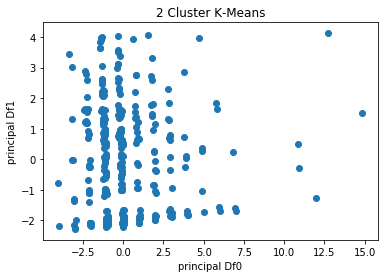

In [157]:
kmeans=KMeans(n_clusters=2)
kmeansoutput=kmeans.fit(mavoix1)
kmeansoutput
plt.figure('2 Cluster K-Means')
plt.scatter(principalDf["datascientist"], principalDf["webdevelopment"])
#plt.scatter(x='principal component 1',y='principal component 2', c=kmeansoutput.labels_)
plt.xlabel('principal Df0')
plt.ylabel('principal Df1')
plt.title('2 Cluster K-Means')
plt.show()


below or equal to -